<a href="https://colab.research.google.com/github/Baldros/Neural-Networks/blob/main/RedeRegress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Redes Neurais é uma técnica geralmente ligadas ao problema
    de Classificação, porém, ela não se restringe a esse tópico.
    A ideia aqui é elaborar um estudo sobre utilização de Redes
    Neurais para Regressão.

In [1]:
# Packages de Suportes:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix as sm

# Package para Geração de Dados:
from sklearn.datasets import make_friedman1

# Packages para o ML:
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

# Geração de dados:

    A função make_friedman1 é uma função de geração
    de dados que vamos utilizar aqui para construir o
    nosso conjunto de dados para a regressão.

    Sabemos que uma rede neural para funcionar bem
    precisa de alguns fatores. Dentre eles está um
    grande conjunto de dados e uma certa estruturação
    dos dados, então não é qualquer conjunto de dados
    tabular que funciona bem com esse tipo de técnica.

In [2]:
make_friedman1

<function sklearn.datasets._samples_generator.make_friedman1(n_samples=100, n_features=10, *, noise=0.0, random_state=None)>

In [3]:
# Gerando dados:
X, y = make_friedman1(n_samples=10000,random_state=42, n_features= 5, noise=0.1)

In [4]:
# Concatenando as matrizes:
Xy = np.c_[X,y]

# Dataframe
df = pd.DataFrame(Xy);df

,0,1,2,3,4,5
0,0.374540,0.950714,0.731994,0.598658,0.156019,16.836355
1,0.155995,0.058084,0.866176,0.601115,0.708073,12.638554
2,0.020584,0.969910,0.832443,0.212339,0.181825,5.932218
3,0.183405,0.304242,0.524756,0.431945,0.291229,7.451410
4,0.611853,0.139494,0.292145,0.366362,0.456070,9.636083
...,...,...,...,...,...,...
9995,0.532481,0.550056,0.984144,0.599966,0.666627,22.044380
9996,0.213723,0.106865,0.602010,0.864880,0.587373,12.465644
9997,0.442783,0.578207,0.468772,0.141882,0.741184,12.521285
9998,0.533038,0.399323,0.559639,0.241227,0.427958,10.702529


## Visualizações:

    É interessante entender um pouco sobre como está esse conjunto de dados.

<Figure size 1500x800 with 0 Axes>

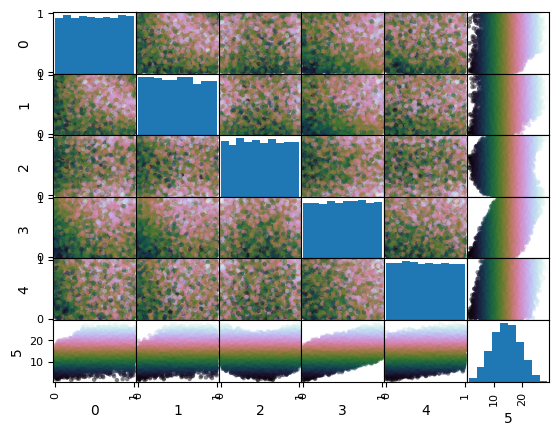

In [5]:
# Matrix de Dispersão:
plt.figure(figsize=(15,8))
sm(df, c = y, s = 40, cmap = 'cubehelix')
plt.show()

<ipython-input-6-170dd050ddd0>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


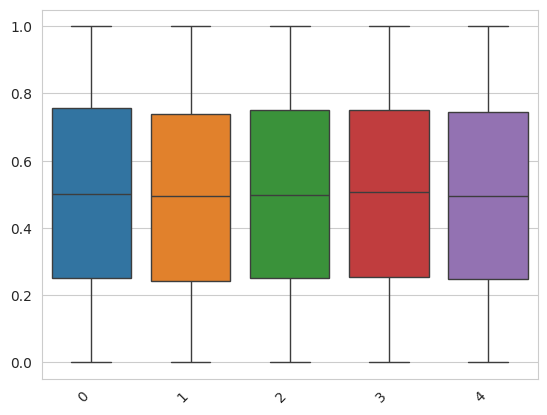

In [6]:
# Crie um gráfico de caixa (boxplot) usando Seaborn
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.drop(5,axis=1))

# Rotacione os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Exiba o gráfico
plt.show()

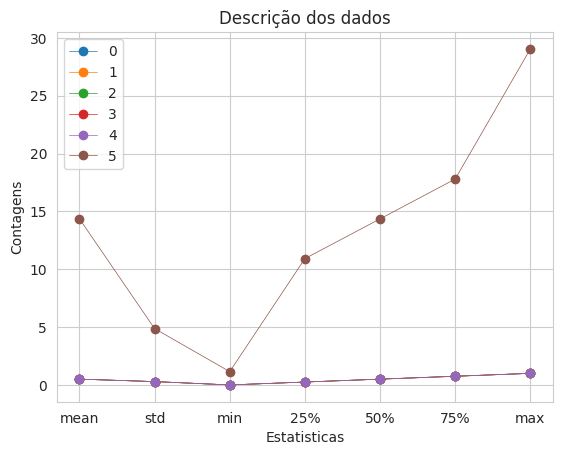

In [7]:
df.describe().drop('count', axis=0).plot(marker='o',linewidth=0.5,title='Descrição dos dados',xlabel='Estatisticas',ylabel='Contagens')
plt.show()

In [8]:
df.describe()

,0,1,2,3,4,5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.501298,0.493237,0.499707,0.502962,0.497112,14.358944
std,0.289602,0.288447,0.288252,0.288039,0.287645,4.867638
min,0.000048,0.000006,0.000012,0.000110,0.000135,1.148478
25%,0.251798,0.241669,0.250482,0.252734,0.248530,10.915614
50%,0.499756,0.494714,0.498054,0.505929,0.495780,14.351772
75%,0.755352,0.738906,0.750048,0.750476,0.745750,17.794894
max,0.999805,0.999972,0.999957,0.999925,0.999673,29.039678


## Preparando os dados:

    Como em todo processo, precisamos dividir
    os dados em dados de treino e dados de teste.

In [9]:
# Splitando os dados:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=6)

# Regressão Linear:

    O primeiro passo aqui é utilizar a Regressão
    linear para ver como esse processo funciona.

In [10]:
# Instanciando o modelo:
model = LinearRegression()

# Ajustando o modelo:
reg = model.fit(X_train, y_train)

# Predição:
predictions = reg.predict(X_test)

In [11]:
# Métricas:
print(f'Erro quadrático Médio = {mse(y_test,predictions)}')
print(f'R2 = {r2(y_test,predictions)}')

Erro quadrático Médio = 6.049243421256334
R2 = 0.7500903590659338


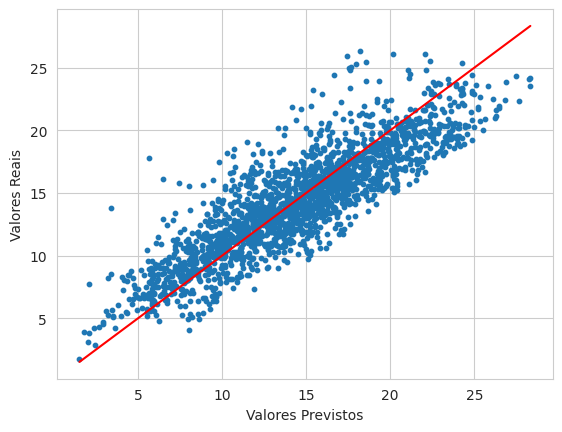

In [12]:
# Visualização:
ref = np.linspace(min(y_test),max(y_test),100) # Vetor de referência
plt.scatter(y_test, predictions, s=10) # Pontos de teste
plt.plot(ref,ref, c='r') # Reta de referência

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')

plt.show()

    Note que há uma heterosticidade no conjunto e dados.

166.81764309136975


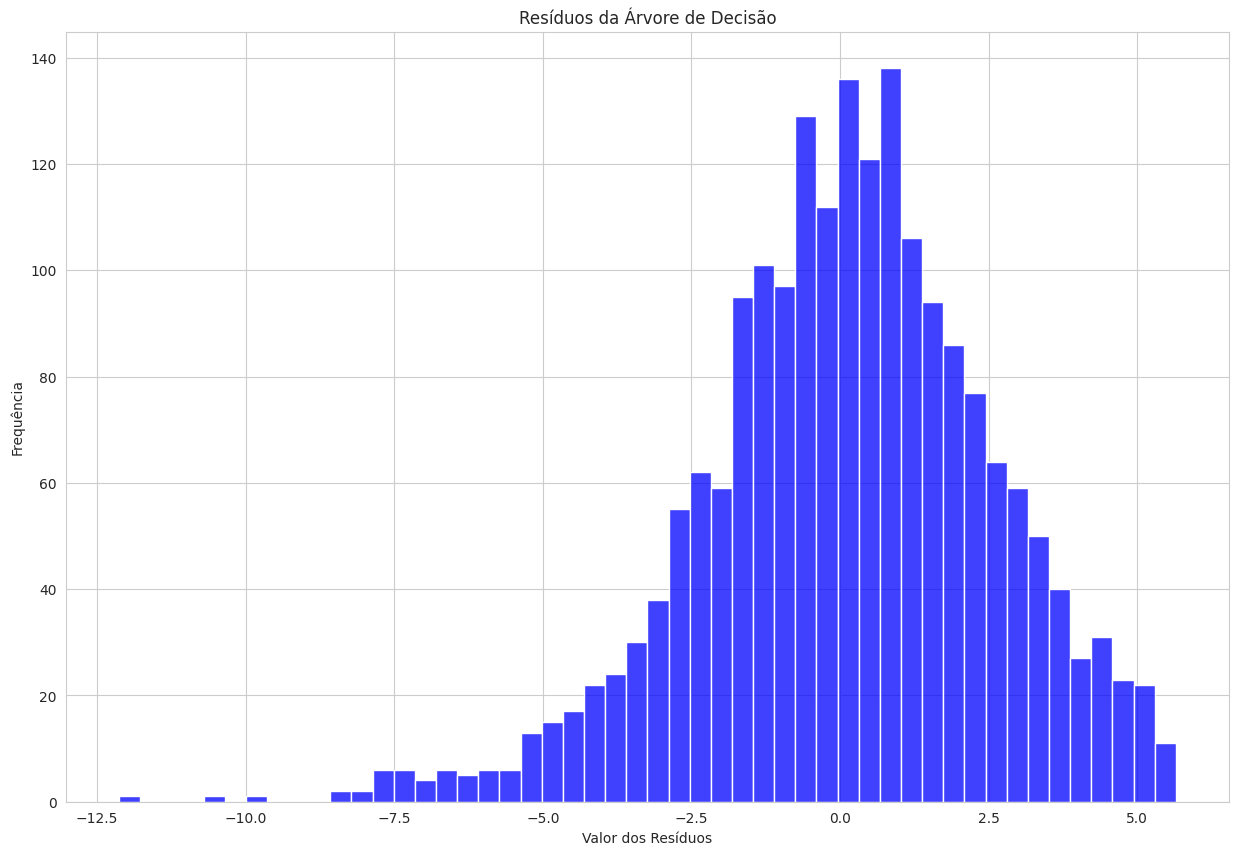

In [13]:
# Análise Resíduos:
residues_RF = y_test - predictions
print(residues_RF.sum())
# Plotar os resíduos
plt.figure(figsize=(15,10))
plt.grid(True)
sns.histplot(residues_RF, bins=50, color='blue')
plt.title("Resíduos da Árvore de Decisão")
plt.xlabel("Valor dos Resíduos")
plt.ylabel("Frequência")
plt.savefig('Resíduos_RF.png', bbox_inches='tight')
plt.show()

# Regressão Usando MLP:

    Vamos agora testar a MLP para regressão.

In [14]:
def rede(n_layers = 1 ,n_elements_layer = 3):
  layer_size=(n_elements_layer,)
  for i in range(0,n_layers-1):
    layer_size += (n_elements_layer,)

  return layer_size

In [15]:
layer_size = rede();layer_size

(3,)

In [16]:
# Instanciando modelo:
model = MLPRegressor(random_state=42, max_iter = 1000,
                     hidden_layer_sizes = layer_size,
                     learning_rate = "adaptive",
                     activation = 'relu')

In [17]:
# Ajustando rede:
reg = model.fit(X_train, y_train);reg

MLPRegressor(hidden_layer_sizes=(3,), learning_rate='adaptive', max_iter=1000,
             random_state=42)

    Por padrão, usa-se a uma versão do
    algoritmo de gradiente descentente
    melhor para a regressão.

In [18]:
# Predições:
predictions_rn = reg.predict(X_test);predictions_rn

array([17.51346537,  8.28655334, 23.67541345, ...,  5.97322515,
       16.14342802, 16.9220024 ])

In [19]:
# Métricas:
print(f'Erro quadrático Médio = {mse(y_test,predictions_rn)}')
print(f'R2 = {r2(y_test,predictions_rn)}')

Erro quadrático Médio = 6.043106525104028
R2 = 0.750343889864262


    O ganho aqui com relação a regressão linear é dispresivel,
    então vamos elaborar um pouco mais as coisas.

In [20]:
# Criando outra rede:
layer_size = rede(3,100);layer_size

(100, 100, 100)

In [21]:
# Instanciando modelo:
model = MLPRegressor(random_state=42, max_iter = 1000,
                     hidden_layer_sizes = layer_size,
                     learning_rate = "adaptive",
                     activation = 'relu')

In [22]:
# Ajustando rede:
reg = model.fit(X_train, y_train);reg

MLPRegressor(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
             max_iter=1000, random_state=42)

In [23]:
# Predições:
predictions_rn = reg.predict(X_test);predictions_rn

array([12.13166509, 10.19786781, 22.72699317, ...,  7.54222145,
       19.07419181, 18.92984808])

In [24]:
# Métricas:
print(f'Erro quadrático Médio = {mse(y_test,predictions_rn)}')
print(f'R2 = {r2(y_test,predictions_rn)}')

Erro quadrático Médio = 0.01947871081633746
R2 = 0.9991952848832526


    Opa... Olha como o resultado já ficou muito melhor.

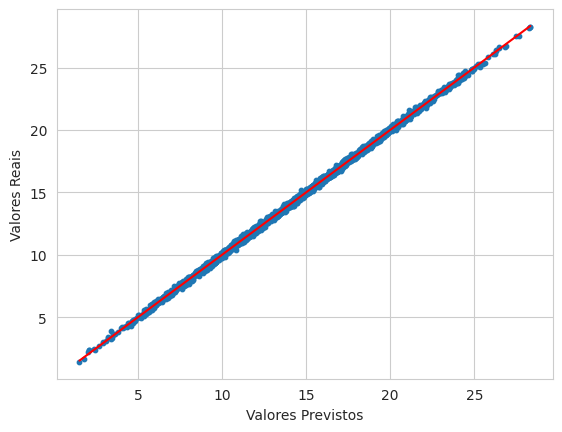

In [25]:
# Visualização:
ref = np.linspace(min(y_test),max(y_test),100) # Vetor de referência
plt.scatter(y_test, predictions_rn, s=10) # Pontos de teste
plt.plot(ref,ref, c='r') # Reta de referência

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')

plt.show()

-20.13895159459958


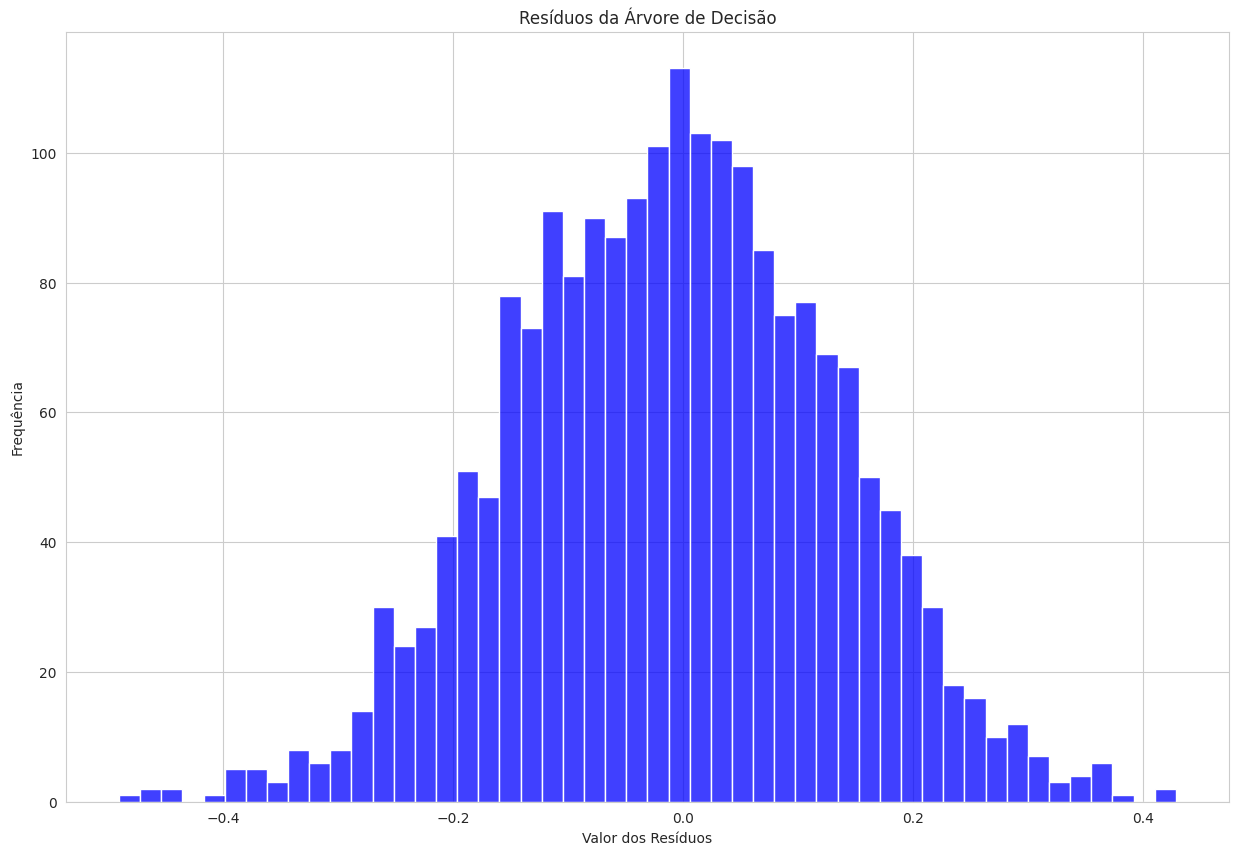

In [26]:
# Análise Resíduos:
residues_RF = y_test - predictions_rn
print(residues_RF.sum())
# Plotar os resíduos
plt.figure(figsize=(15,10))
plt.grid(True)
sns.histplot(residues_RF, bins=50, color='blue')
plt.title("Resíduos da Árvore de Decisão")
plt.xlabel("Valor dos Resíduos")
plt.ylabel("Frequência")
plt.savefig('Resíduos_RF.png', bbox_inches='tight')
plt.show()